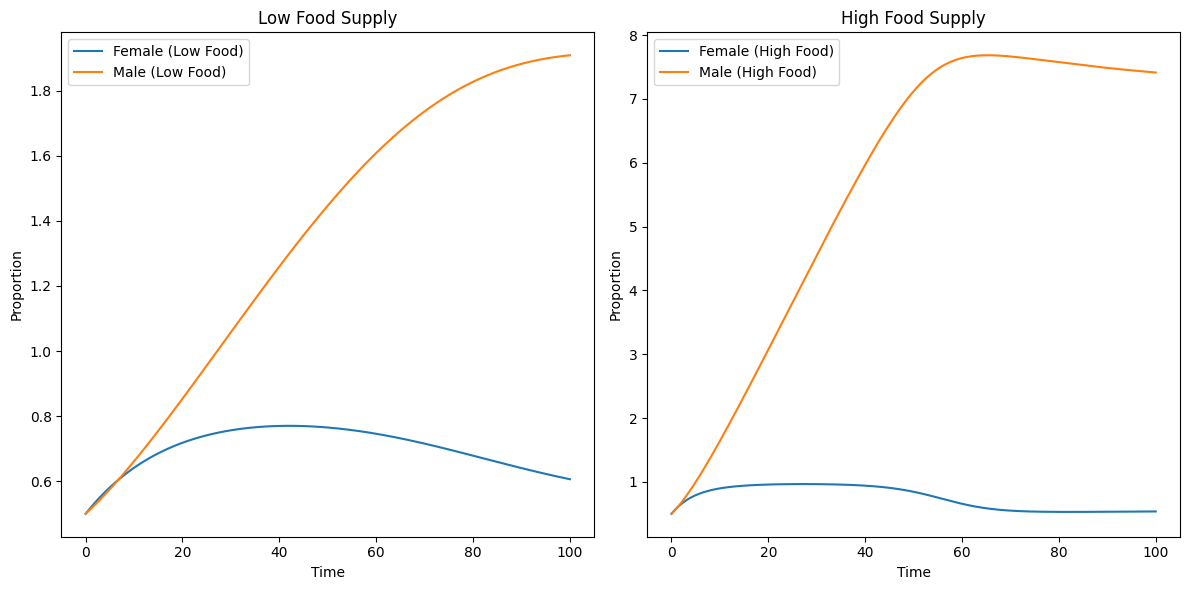

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义性别分化微分方程
def gender_differentiation(y, t, beta, gamma, food_supply):
    F, M = y
    GF = 0.1  # 基础雌性增长参数
    GM = 0.08  # 基础雄性增长参数

    # 根据食物供应条件进行调整
    GF *= food_supply
    GM *= food_supply

    dFdt = GF * (1 - F) - beta * F * (1 - F) * M
    dMdt = GM * F - gamma * F * (1 - F) * M
    return [dFdt, dMdt]

# 设置参数
beta = 0.05  # 雌性影响参数
gamma = beta  # 雄性影响参数

# 初始条件
initial_conditions = [0.5, 0.5]  # 初始雌性和雄性比例

# 设置时间范围
time = np.linspace(0, 100, 1000)

# 模拟环境剧烈变化的情况
food_supply_low = 0.5  # 食物供应条件变化为低
result_low_food = odeint(gender_differentiation, initial_conditions, time, args=(beta, gamma, food_supply_low))
F_low_food, M_low_food = result_low_food.T

food_supply_high = 2.0  # 食物供应条件变化为高
result_high_food = odeint(gender_differentiation, initial_conditions, time, args=(beta, gamma, food_supply_high))
F_high_food, M_high_food = result_high_food.T

# 绘图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time, F_low_food, label='Female (Low Food)')
plt.plot(time, M_low_food, label='Male (Low Food)')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Low Food Supply')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, F_high_food, label='Female (High Food)')
plt.plot(time, M_high_food, label='Male (High Food)')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('High Food Supply')
plt.legend()

plt.tight_layout()
plt.show()


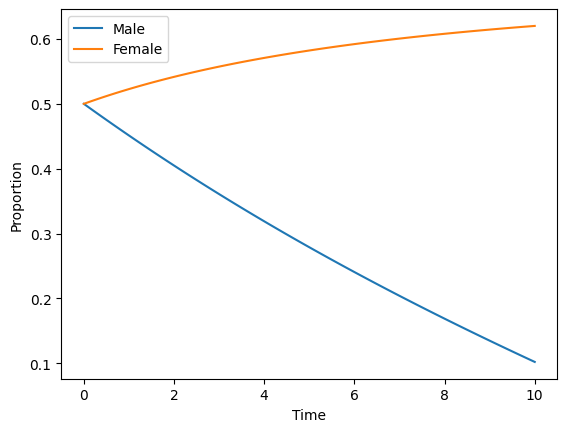

In [28]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 修改微分方程
def model(y, t, GM, GF, beta, gamma):
    M, F = y
    dMdt = GM * F - gamma * F * (1 - F)
    dFdt = GF * (1 - F) - beta * F * (1 - F)
    return [dMdt, dFdt]

# 更新参数
GM = 0.1  # 与食物供应相关的增长参数（雄性）
GF = 0.2  # 与食物供应相关的增长参数（雌性）
beta = 0.3  # 性别分化常量
gamma = 0.4  # 性别分化常量

# 设置初始条件
initial_conditions = [0.5, 0.5]  # 初始雄性和雌性比例

# 设置时间点
t = np.linspace(0, 10, 100)  # 从0到10，分成100个时间点

# 解微分方程
solution = odeint(model, initial_conditions, t, args=(GM, GF, beta, gamma))

# 提取解的结果
M, F = solution.T

# 绘制结果
plt.plot(t, M, label='Male')
plt.plot(t, F, label='Female')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend()
plt.show()


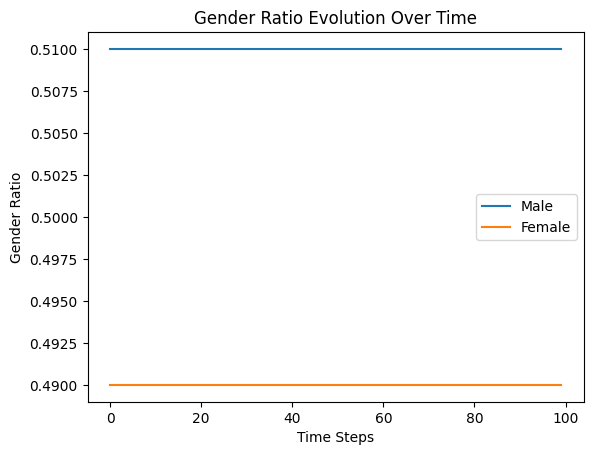

In [29]:
import numpy as np
import matplotlib.pyplot as plt

class EelAgent:
    def __init__(self, gender, age, reproduction_state, resource_need):
        self.gender = gender
        self.age = age
        self.reproduction_state = reproduction_state
        self.resource_need = resource_need

    def acquire_resource(self, environment_availability, competition_factor, neighbors_resource):
        acquired_resource = self.resource_need * environment_availability - competition_factor * np.sum(neighbors_resource)
        return acquired_resource

    def reproduce(self, reproduction_competition_factor, acquired_resource):
        reproduction_success_rate = reproduction_competition_factor * acquired_resource
        return np.random.rand() < reproduction_success_rate

    def adjust_gender_ratio(self, gender_adjust_factor, environment_availability, base_threshold):
        new_male_ratio = gender_adjust_factor * (environment_availability - base_threshold)
        return new_male_ratio

class EelPopulation:
    def __init__(self, size, base_resource_rate, base_reproduction_rate, base_male_ratio, reproduction_competition_factor, gender_adjust_factor, base_threshold):
        self.agents = [EelAgent(gender=np.random.choice(['Male', 'Female']), age=0, reproduction_state=False, resource_need=np.random.rand()) for _ in range(size)]
        self.base_resource_rate = base_resource_rate
        self.base_reproduction_rate = base_reproduction_rate
        self.base_male_ratio = base_male_ratio
        self.reproduction_competition_factor = reproduction_competition_factor
        self.gender_adjust_factor = gender_adjust_factor
        self.base_threshold = base_threshold

    def simulate_step(self):
        environment_availability = np.random.rand()
        competition_factor = np.random.rand()
        neighbors_resource = [agent.resource_need for agent in self.agents]

        for agent in self.agents:
            acquired_resource = agent.acquire_resource(environment_availability, competition_factor, neighbors_resource)
            if agent.reproduce(self.reproduction_competition_factor, acquired_resource):
                self.agents.append(EelAgent(gender=np.random.choice(['Male', 'Female']), age=0, reproduction_state=False, resource_need=np.random.rand()))
            new_male_ratio = agent.adjust_gender_ratio(self.gender_adjust_factor, environment_availability, self.base_threshold)
            # Adjust gender ratio (not implemented in this simplified example)

# Parameters
population_size = 100
time_steps = 100
base_resource_rate = 0.5
base_reproduction_rate = 0.2
base_male_ratio = 0.5
reproduction_competition_factor = 0.3
gender_adjust_factor = 0.1
base_threshold = 0.3

# Initialize population
eel_population = EelPopulation(
    size=population_size,
    base_resource_rate=base_resource_rate,
    base_reproduction_rate=base_reproduction_rate,
    base_male_ratio=base_male_ratio,
    reproduction_competition_factor=reproduction_competition_factor,
    gender_adjust_factor=gender_adjust_factor,
    base_threshold=base_threshold
)

# Simulation loop
for step in range(time_steps):
    eel_population.simulate_step()

# Data collection and visualization (not shown in this simplified example)
# Simulation loop
male_ratios = []  # List to store male ratios over time
female_ratios = []  # List to store female ratios over time
for step in range(time_steps):
    eel_population.simulate_step()
    
    # Collect data at each step
    male_ratio = sum(agent.gender == 'Male' for agent in eel_population.agents) / len(eel_population.agents)
    female_ratio = 1 - male_ratio  # Assuming only two genders (Male and Female)
    male_ratios.append(male_ratio)
    female_ratios.append(female_ratio)

# Plotting the results
plt.plot(range(time_steps), male_ratios, label='Male')
plt.plot(range(time_steps), female_ratios, label='Female')
plt.xlabel('Time Steps')
plt.ylabel('Gender Ratio')
plt.legend()
plt.title('Gender Ratio Evolution Over Time')
plt.show()